In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
from sklearn.metrics import log_loss

In [2]:
sub_path = './tpot_sub/kandydaci/'
all_files = os.listdir(sub_path)
all_files

['0.141551.csv',
 '0.143366.csv',
 '0.143742.csv',
 '0.144690.csv',
 '0.145677.csv',
 '0.145682.csv',
 '0.145730.csv',
 '0.146135.csv',
 '0.147212.csv',
 '0.147523.csv',
 '0.147743.csv',
 '0.148482.csv',
 '0.149710.csv',
 '0.150704.csv',
 '0.151069.csv',
 '0.151074.csv',
 '0.151220.csv',
 '0.151296.csv',
 '0.151701.csv',
 '0.151993.csv',
 '0.152070.csv',
 '0.152414.csv',
 '0.152467.csv',
 '0.152529.csv',
 '0.153306.csv',
 '0.153540.csv',
 '0.154303.csv',
 '0.154746.csv',
 '0.154793.csv',
 '0.155136.csv',
 '0.155305.csv',
 '0.155464.csv',
 '0.155671.csv',
 '0.155997.csv',
 '0.156511.csv',
 '0.156904.csv',
 '0.156958.csv',
 '0.157305.csv',
 '0.158064.csv',
 '0.158125.csv',
 '0.158326.csv',
 '0.160107.csv',
 '0.162967.csv',
 '0.163699.csv',
 '0.164149.csv',
 '0.166767.csv',
 '0.170149.csv',
 '0.171613.csv',
 '0.172072.csv',
 '0.179418.csv',
 '0.183188.csv',
 '0.183866.csv',
 '0.184249.csv',
 '0.184829.csv',
 '0.187728.csv',
 '0.205533.csv',
 '0.224611.csv',
 '0.226538.csv',
 '0.234426.csv

In [3]:
df_list = []
for i in range(len(all_files)):
    #df_name = 'df_' + str(i)
    #df_curr = eval(df_name)
    df_curr = pd.read_csv(sub_path + '/' + all_files[i])
    df_list.append(df_curr)
    
df = df_list[0]
for i in df_list[1:]:
    df = pd.merge(df, i, on='id')

In [4]:
df.columns = ['id', *all_files]

In [7]:
weights_raw = [float(name[:8]) for name in all_files]

In [6]:
tab = df.iloc[0,1:].tolist()

In [28]:
weights = 1/np.asarray(weights_raw)
weights = weights**10
weights = weights/max(weights)

In [29]:
weights[:20]

array([ 1.        ,  0.88037507,  0.85761543,  0.80305308,  0.75027336,
        0.7500159 ,  0.74754918,  0.727088  ,  0.6756119 ,  0.66150337,
        0.65171885,  0.61999949,  0.57098055,  0.53441867,  0.52164599,
        0.52147337,  0.51646046,  0.513872  ,  0.50031668,  0.49078756])

In [30]:
weights[-20:]

array([ 0.23370562,  0.22737725,  0.19410122,  0.15879448,  0.14575638,
        0.14191469,  0.09342633,  0.07588557,  0.07313329,  0.07162721,
        0.069411  ,  0.05940717,  0.02400567,  0.00988142,  0.00907233,
        0.00644276,  0.00499088,  0.0025733 ,  0.00241394,  0.00183462])

In [31]:
np.average(tab, weights=weights)

0.089964823927750126

In [74]:
def stack(tab):
    #return np.average(tab[:40], weights=weights[:40])
    
    if np.average(tab, weights=weights) > 0.9:
        return max(tab)
    elif np.average(tab, weights=weights) < 0.1:
        return min(tab)
    else:
        return np.median(tab[:int(0.3*len(tab))])
      

In [75]:
result = []
for i, j in df.iloc[:, 1:64].iterrows():
    raw_vote = np.array(j)
    res = stack(raw_vote)
    result.append(res)
    
df['is_iceberg3'] = result

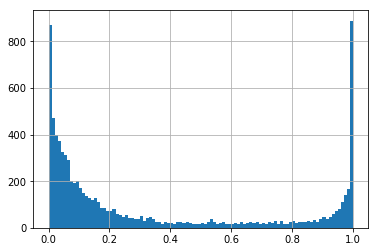

In [67]:
df['is_iceberg2'] = np.median(np.array(df.iloc[:, 1:30]), axis=1)
df['is_iceberg2'].hist(bins=100)

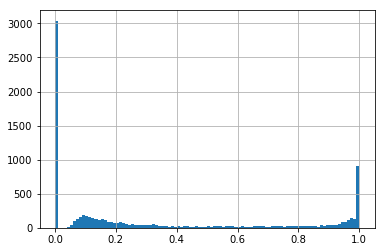

In [70]:
df['is_iceberg1'].hist(bins=100)

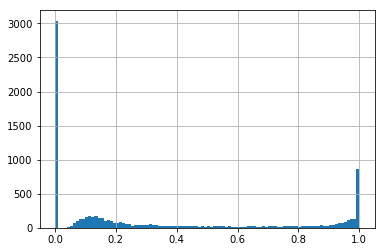

In [76]:
df['is_iceberg3'].hist(bins=100)

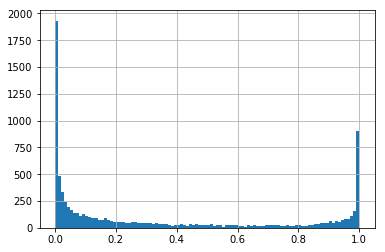

In [80]:
s = pd.read_csv('./tpot_sub/tpot3.csv')
s['is_iceberg'].hist(bins=100)

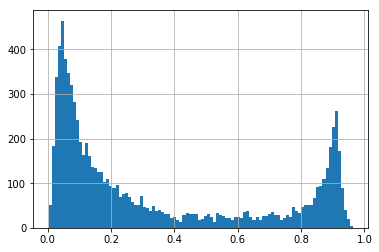

In [35]:
df['is_iceberg'].hist(bins=100)

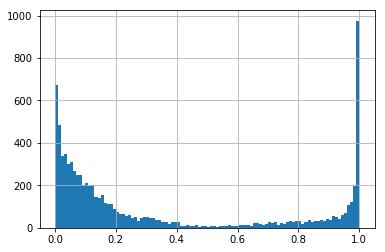

In [51]:
df['0.143366.csv'].hist(bins=100)

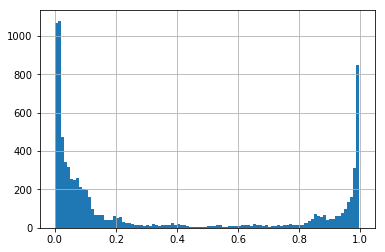

In [52]:
df['0.141551.csv'].hist(bins=100)

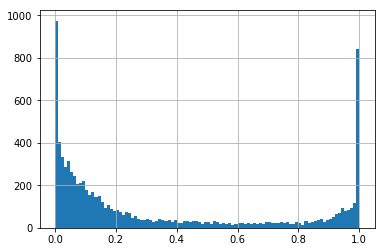

In [54]:
df['0.144690.csv'].hist(bins=100)

In [38]:
df[['id', 'is_iceberg']]

,id,is_iceberg
0,5941774d,3.858731e-05
1,4023181e,4.127206e-01
2,b20200e4,0.000000e+00
3,e7f018bb,1.000000e+00
4,4371c8c3,3.613506e-01
5,a8d9b1fd,0.000000e+00
6,29e7727e,0.000000e+00
7,92a51ffb,1.000000e+00
8,c769ac97,0.000000e+00
9,aee0547d,0.000000e+00


In [43]:
df[['id', 'is_iceberg']].to_csv('submission_stacking11_tpot.csv', index=False)

In [44]:
sub1 = pd.read_csv('./submitted/submission2.csv')

In [45]:
sub1.head()

,id,is_iceberg
0,5941774d,0.027611
1,4023181e,0.535082
2,b20200e4,0.000003
3,e7f018bb,0.999439
4,4371c8c3,0.712354


In [46]:
df[['id', 'is_iceberg']].head()

,id,is_iceberg
0,5941774d,0.047475
1,4023181e,0.412721
2,b20200e4,0.000000
3,e7f018bb,1.000000
4,4371c8c3,0.361351


In [48]:
sub = pd.merge(sub1, df[['id', 'is_iceberg']], on='id')

In [49]:
sub.corr()

,is_iceberg_x,is_iceberg_y
is_iceberg_x,1.000000,0.938885
is_iceberg_y,0.938885,1.000000
